In [26]:
!pip install --upgrade torch torchvision

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import numpy as np
import string
import regex as re
import json
# read text file into pandas DataFrame
df = pd.read_csv("shakespeare.txt", sep=" ")



In [16]:
pip install pyphen

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pyphen

In [2]:
data = open("shakespeare.txt", 'r').read()
chars = sorted(list(set(data)))
data_size, vocab_size = len(data), len(chars)
print("----------------------------------------")
print("Data has {} characters, {} unique".format(data_size, vocab_size))
print("----------------------------------------")

# char to index and index to char maps
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

----------------------------------------
Data has 98029 characters, 71 unique
----------------------------------------


In [3]:
temp = open("Syllable_dictionary.txt", 'r').read()
syl= pd.read_csv("Syllable_dictionary.txt", sep=" ",)
len(syl)

3204

In [4]:
syl[1] = syl.index
syl.index = np.arange(len(syl))
syl[2] = syl["'gainst"]
syl = syl.drop(columns = ["'gainst","1"])
df2 = {1: "'gainst", 2: 1}
syl = syl.append(df2, ignore_index = True)

syl #cleaning

/tmp/ipykernel_413/2809210098.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  syl = syl.append(df2, ignore_index = True)


,1,2
0,'greeing,E1
1,'scaped,1
2,'tis,1
3,'twixt,1
4,a,1
...,...,...
3200,youth,1
3201,youth's,1
3202,youthful,2
3203,zealous,2


In [5]:
syl.loc[(syl[2] == 'E4')] = '4' #end words are not necessary for what we want
syl.loc[(syl[2] == 'E3')] = '3' #part of cleaning
syl.loc[(syl[2] == 'E2')] = '2'
syl.loc[(syl[2] == 'E1')] = '1'

In [6]:
stanzas = re.split(r"\n\n", data)

In [7]:
stanzas[0]

"                   1\nFrom fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut as the riper should by time decease,\nHis tender heir might bear his memory:\nBut thou contracted to thine own bright eyes,\nFeed'st thy light's flame with self-substantial fuel,\nMaking a famine where abundance lies,\nThy self thy foe, to thy sweet self too cruel:\nThou that art now the world's fresh ornament,\nAnd only herald to the gaudy spring,\nWithin thine own bud buriest thy content,\nAnd tender churl mak'st waste in niggarding:\n  Pity the world, or else this glutton be,\n  To eat the world's due, by the grave and thee."

In [8]:
lines = [] #split sonnets into lines
for i in stanzas:
    j = i.split('\n')
    for x in j:
        lines.append(x)

In [9]:
words = []
for i in lines:
    i = re.sub(r'[^\w\s\']', '', i)
    t = i.split(' ')
    words.append(t)

In [12]:
language = pyphen.Pyphen(lang='en')

In [13]:
linez = [] #split words into syllables (in case this is better than just number of syllables per word)
for i in words:
    syllables = []
    for j in i:
        t = language.inserted(j).split("-")
        syllables.append(t)
    linez.append(syllables)

In [14]:
linez_syl = [] #split words into syllables (in case this is better than just number of syllables per word)
for i in words:
    for j in i:
        t = language.inserted(j).split("-")
        for i in t:
            linez_syl.append(i)
    

In [15]:
linez_syl #first dataset

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '1',
 'From',
 'fairest',
 'creatures',
 'we',
 'de',
 'sire',
 'in',
 'crease',
 'That',
 'thereby',
 'beau',
 "ty's",
 'rose',
 'might',
 'nev',
 'er',
 'die',
 'But',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'de',
 'cease',
 'His',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 'But',
 'thou',
 'con',
 'trac',
 'ted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 "Feed'st",
 'thy',
 "light's",
 'flame',
 'with',
 'self',
 'sub',
 'stan',
 'tial',
 'fuel',
 'Mak',
 'ing',
 'a',
 'fam',
 'ine',
 'where',
 'abund',
 'ance',
 'lies',
 'Thy',
 'self',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 'Thou',
 'that',
 'art',
 'now',
 'the',
 "world's",
 'fresh',
 'or',
 'na',
 'ment',
 'And',
 'only',
 'her',
 'ald',
 'to',
 'the',
 'gaudy',
 'spring',
 'With',
 'in',
 'thine',
 'own',
 'bud',
 'bur',
 'i',
 'est',
 'thy',
 'con',
 'tent',
 'And',
 't

In [16]:
word_dic = {} #make a dictionary of words with their syllable counts
for i in range(len(syl)):
    for j in range(i):
        word_dic[syl[1][j]] = syl[2][j]

In [17]:
list_o_lines = []
for i in words:
    list_o_words = []
    for j in i:
        j = j.lower() 
        if j == " ":
            list_o_words.append((j, '0')) #empty is 0 syllables
        elif j.isnumeric():
            list_o_words.append((j, 'NA')) #not appliable, can be removed later for sonnet #
        elif j != '' and j not in word_dic:
            t = language.inserted(j).split("-") #some words not in the syllable dictionary
            list_o_words.append((j, str(t).count(',')+1))
        elif j != '':
            list_o_words.append((j, word_dic[j]))
    list_o_lines.append(list_o_words)

In [18]:
list_o_lines #2nd dataset
#this is each line tokenized by word and the number of syllables in each word

[[('1', 'NA')],
 [('from', '1'),
  ('fairest', '2'),
  ('creatures', '2'),
  ('we', '1'),
  ('desire', '2'),
  ('increase', '2')],
 [('that', '1'),
  ('thereby', '2'),
  ("beauty's", '2'),
  ('rose', '1'),
  ('might', '1'),
  ('never', 2),
  ('die', '1')],
 [('but', '1'),
  ('as', '1'),
  ('the', '1'),
  ('riper', '2'),
  ('should', '1'),
  ('by', '1'),
  ('time', '1'),
  ('decease', '2')],
 [('his', '1'),
  ('tender', '2'),
  ('heir', '1'),
  ('might', '1'),
  ('bear', '1'),
  ('his', '1'),
  ('memory', '3')],
 [('but', '1'),
  ('thou', '1'),
  ('contracted', '3'),
  ('to', '1'),
  ('thine', '1'),
  ('own', '1'),
  ('bright', '1'),
  ('eyes', '1')],
 [("feed'st", '1'),
  ('thy', '1'),
  ("light's", '1'),
  ('flame', '1'),
  ('with', '1'),
  ('selfsubstantial', 4),
  ('fuel', '1')],
 [('making', 2),
  ('a', '1'),
  ('famine', '2'),
  ('where', '1'),
  ('abundance', '3'),
  ('lies', '1')],
 [('thy', '1'),
  ('self', '1'),
  ('thy', '1'),
  ('foe', '1'),
  ('to', '1'),
  ('thy', '1'),
  

#PART B

In [19]:
import math 

In [20]:
data = open("shakespeare.txt", 'r').read()
data[20]

'\n'

In [21]:
import numpy as np
import torch
import regex as re
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Categorical

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [24]:
data = open("shakespeare.txt", 'r').read()
chars = sorted(list(set(data)))
data_size, vocab_size = len(data), len(chars)
print("----------------------------------------")
print("Data has {} characters, {} unique".format(data_size, vocab_size))
print("----------------------------------------")

# char to index and index to char maps
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

----------------------------------------
Data has 98029 characters, 71 unique
----------------------------------------


In [25]:

datax = data.split('\n\n') 
data = []
for i in datax:
    n = re.sub(r'\d+', '', i) #decided to remove the sonnet numbers
    #n = n.replace(" ", "")#.replace("\n","")
    data.append(list(n))

In [33]:
linez_syl[10]

''

In [26]:
#data = list(data)
#print(data[0])
# for i, item in enumerate(data):
#     for j, ch in enumerate(item):
#         item[j] = char_to_ix[ch]
#     data[i] = torch.tensor(item).to(device)
for k, l in enumerate(data):
    for i, ch in enumerate(l):
        #print(char_to_ix[ch])
        l[i] = char_to_ix[ch]
    data[k] = torch.tensor(l).to(device)
# data = torch.unsqueeze(data, dim=1)



In [35]:
data[0][0]

tensor(1)

In [36]:
type(data[0])

torch.Tensor

In [27]:
class RNN(nn.Module):
    def __init__(self, input_size, embedding_size, output_size, hidden_size):
        super(RNN, self).__init__()
        self.embedding = nn.Embedding(input_size, embedding_size)
        self.rnn = nn.LSTM(input_size=input_size, hidden_size=hidden_size,num_layers=1)
        self.decoder = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax()
        self.dropout = nn.Dropout(p=0.1)
    
    def forward(self, input_seq, hidden_state):
        embedding = self.embedding(input_seq)
        #print(len(embedding))
        output, hidden_state = self.rnn(embedding, hidden_state)
        output = self.dropout(output)
        output = self.decoder(output)/.1
        #output = self.softmax(output/.1)
        return output, (hidden_state[0].detach(), hidden_state[1].detach())

In [28]:
model = RNN(input_size=vocab_size*200, embedding_size=vocab_size*200, output_size=vocab_size, hidden_size=1000).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5,)

In [24]:
#change softmax and temperature combos
#enbedding, input, hidden size
#change lr
#np.abs, square

In [39]:
#feed into model by character
len(data)

154

In [235]:
import time

Explain in detail what model you implemented? What parameters did you tune? Com- ment on the poems that your model produced. Does the LSTM successfully learn sen- tence structure and/or sonnet structure? How about the runtime/amount of training data needed? Include generated poems using temperatures of 1.5, 0.75, and 0.25 with the following initial 40-character seed: “shall i compare thee to a summer’s day?\n”, and comment on their differences.

The model learns the very basic sentence structure and each line is about 10 syllables (give or take). It creates a balance of real words and made up words (50-50?). I kept the same model, but tuned many of the hyperparameters to reasonably optimize it. 

- I removed the softmax step as it worsened my model and its train error
- I tested different temperature values and dropout values, (results in graphs) and came to the conclusion that dropout did not improve my model, but a very low temperature value (.1) did, so I kept it. 
- I tried implementing regularization, but could not figure out how to apply it so I did not.
- I increased the number of training epochs to 20, and later 50 for my final model as it improved my model.
- I played with the learning rate, but I did not find it improving my model.
- I altered tbe input/embedding size significantly as well as the hidden size, which made my model significantly better, but also slower.

Model took a lot longer to generate when some hyperparams were tuned (input, embedding, and vocab size)

In [33]:
epochs = 20
epoch = []
error = []
#start_time = time.time()
for i_epoch in range(1, epochs+1):
        
    n = 0
    running_loss = 0
    hidden_state = None
    for j in data:
        for i in range(40,len(j)-1):
        #hidden_state = torch.zeros(1, 1, 100)
            input_seq = j[i-40 : i]
            target_seq = j[i-40+1 : i+1]
        #print(len(input_seq))
        # forward pass
        output, _ = model(input_seq, hidden_state)
        
        # compute loss
        loss = loss_fn(torch.squeeze(output), torch.squeeze(target_seq))
        running_loss += loss.item()
        n += 1
        
        # compute gradients and take optimizer step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # print loss after every epoch
    print("Epoch: {0} \t Loss: {1:.8f}".format(i_epoch, running_loss/n))
    epoch.append(i_epoch)
    error.append(running_loss/n)

#end_time = time.time()
    


Epoch: 1 	 Loss: 4.59949200
Epoch: 2 	 Loss: 3.80745855
Epoch: 3 	 Loss: 3.40147114


KeyboardInterrupt: 

In [249]:
elapsed_time = end_time - start_time
elapsed_time

214.92821979522705

In [40]:
prompt = "shall i compare thee to a summer's day?\n" 
prompt = list(prompt)
for i, ch in enumerate(prompt):
    prompt[i] = char_to_ix[ch]

with torch.no_grad():
    prompt = torch.tensor(prompt).to(device).long()
    hidden_init = None
    output, hidden = model(prompt, hidden_init)
 
    for _ in range(40):
        output = output[-1]
        #print(output)
        prediction = torch.argmax(output)
        print(ix_to_char[int(prediction.detach().cpu().numpy())],end="")
        output, hidden = model(prediction.unsqueeze(0), hidden)

sdddddddbddddb-hzg6(7q!sdddddddddddddddd

In [33]:
prompt = "shall i compare thee to a summer's day?\n" 
prompt = list(prompt)
for i, ch in enumerate(prompt):
    prompt[i] = char_to_ix[ch]

with torch.no_grad():
    prompt = torch.tensor(prompt).to(device).long()
    hidden_init = None
    output, hidden = model(prompt, hidden_init)
    for x in range(10):
        for _ in range(40):
            output = output[-1]
            output_array = output.cpu().numpy()
            probs = np.exp(output_array) / np.sum(np.exp(output_array)) 
            pred = np.random.choice(len(probs), p=probs)

            print(ix_to_char[int(pred)], end="")
            output, hidden = model(torch.tensor(pred).unsqueeze(0).to(device), hidden)
        print('\n')

sfRTisVPzs?rIwV'-lG(zsYejl'nBmWAcYnVrTra

YhYcrTnzs-VpVkAyy2ewuF8jrS8'sdotL1o'o2GH

MlqaGyMpdo0W71MJgiIG24EG2wqsp--isi7'pwu;

usG1rohg
p2ula,jl2Y toaokhw'qmY2tEcSy?to

i2E34jTyiYlTp!10gnh:TV'9epqwlcVD0M5,Mp8r

ovo'jVuKev8nGGuB HOsJgluKRtma
1npo wnoqI

upKnh v2gR HsaWzf?mRVRrBl
gYAoYgNacuTP8K

PIgMbaoosSVTs'psG1TjPmrAuorrezT0iskswoWY

:mBRodYdR6p1orVGKb2Rzgssp2;6?xn(lzmus)jt

2m;LG,Y0MJ!McmHVuYuuzGzG2s'sR7PG2(?lE6PB



In [101]:
import pandas as pd
import seaborn as sns

In [116]:
temp_df = pd.DataFrame()

In [163]:
temp_df['epochs'] = epoch_list5
temp_df['loss'] = error0
temp_df['temperature'] = temperatures

In [164]:
temp_df

,epochs,loss,temperature
0,1,3.338518,1
1,2,2.536248,1
2,3,2.317941,1
3,4,2.203692,1
4,5,2.127429,1
...,...,...,...
75,16,1.216752,.1
76,17,1.179739,.1
77,18,1.155337,.1
78,19,1.121053,.1


<AxesSubplot:xlabel='epochs', ylabel='loss'>

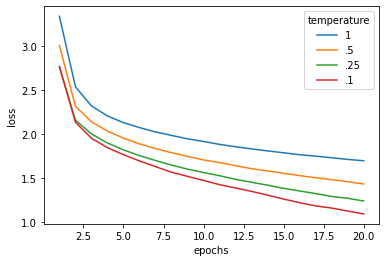

In [166]:
sns.lineplot(data=temp_df, x="epochs", y="loss", hue="temperature")

In [97]:
len(epoch_list5)

20

In [248]:
import seaborn as sns

In [ ]:
#test with syllables and perplexity

In [29]:
words = []
for i in stanzas:
    i = re.sub(r'[^\w\s\']', '', i)
    i = i.replace("\n"," ")
    t = i.split(' ')
    words.append(t)

In [42]:
words

[['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '1',
  'From',
  'fairest',
  'creatures',
  'we',
  'desire',
  'increase',
  'That',
  'thereby',
  "beauty's",
  'rose',
  'might',
  'never',
  'die',
  'But',
  'as',
  'the',
  'riper',
  'should',
  'by',
  'time',
  'decease',
  'His',
  'tender',
  'heir',
  'might',
  'bear',
  'his',
  'memory',
  'But',
  'thou',
  'contracted',
  'to',
  'thine',
  'own',
  'bright',
  'eyes',
  "Feed'st",
  'thy',
  "light's",
  'flame',
  'with',
  'selfsubstantial',
  'fuel',
  'Making',
  'a',
  'famine',
  'where',
  'abundance',
  'lies',
  'Thy',
  'self',
  'thy',
  'foe',
  'to',
  'thy',
  'sweet',
  'self',
  'too',
  'cruel',
  'Thou',
  'that',
  'art',
  'now',
  'the',
  "world's",
  'fresh',
  'ornament',
  'And',
  'only',
  'herald',
  'to',
  'the',
  'gaudy',
  'spring',
  'Within',
  'thine',
  'own',
  'bud',
  'buriest',
  'thy',
  'content',
  'And',
 

In [30]:
linez_syl = [] #split words into syllables (in case this is better than just number of syllables per word)
stz = []
for i in words:
    for j in i:
        if j.isnumeric():
            linez_syl.append(stz)
            stz = []
            j = re.sub(r'\d+', '', j)
        j = j.lower()
        if j == "":
            j = " "
        t = language.inserted(j).split("-")
        for i in t:
            stz.append(i)
linez_syl

[[' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' '],
 [' ',
  'from',
  'fairest',
  'creatures',
  'we',
  'de',
  'sire',
  'in',
  'crease',
  'that',
  'thereby',
  'beau',
  "ty's",
  'rose',
  'might',
  'nev',
  'er',
  'die',
  'but',
  'as',
  'the',
  'riper',
  'should',
  'by',
  'time',
  'de',
  'cease',
  'his',
  'tender',
  'heir',
  'might',
  'bear',
  'his',
  'memory',
  'but',
  'thou',
  'con',
  'trac',
  'ted',
  'to',
  'thine',
  'own',
  'bright',
  'eyes',
  "feed'st",
  'thy',
  "light's",
  'flame',
  'with',
  'self',
  'sub',
  'stan',
  'tial',
  'fuel',
  'mak',
  'ing',
  'a',
  'fam',
  'ine',
  'where',
  'abund',
  'ance',
  'lies',
  'thy',
  'self',
  'thy',
  'foe',
  'to',
  'thy',
  'sweet',
  'self',
  'too',
  'cruel',
  'thou',
  'that',
  'art',
  'now',
  'the',
  "world's",
  'fresh',
  'or',
  'na',
  'ment',
  'and',
  'only',
  'her',
  'ald',
  'to',
  

In [36]:
data = linez_syl
data[0]

[' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ']

In [37]:
all_words = set()

for i in linez_syl:
    for j in i:
        all_words.add(j)


In [46]:
len(all_words)

2818

In [38]:
all_w = sorted(list(all_words))
data_size, vocab_size = len(data), len(all_w)
# print("----------------------------------------")
# print("Data has {} characters, {} unique".format(data_size, vocab_size))
# print("----------------------------------------")

# char to index and index to char maps
char_to_ix = { ch:i for i,ch in enumerate(all_w) }
ix_to_char = { i:ch for i,ch in enumerate(all_w) }

' '

In [39]:
for k, l in enumerate(data):
    for i, ch in enumerate(l):
        #print(ch)
        l[i] = char_to_ix[ch]
    data[k] = torch.tensor(l).to(device)

In [40]:
data = data[1:]

In [41]:
data[0]

tensor([   0,  865,  693,  439, 2677,  489, 2094, 1152,  437, 2377, 2391,  161,
        2553, 1904, 1437, 1524,  653,  533,  287,  104, 2379, 1887, 2057,  289,
        2448,  489,  317, 1092, 2356, 1069, 1437,  154, 1092, 1422,  287, 2410,
         415, 2491, 2341, 2465, 2398, 1613,  265,  680,  743, 2432, 1307,  798,
        2746, 1993, 2262, 2189, 2434,  872, 1386, 1155,   16,  702, 1153, 2703,
          23,   77, 1300, 2432, 1993, 2432,  816, 2465, 2432, 2298, 1993, 2479,
         455, 2410, 2377,  100, 1554, 2379, 2771,  860, 1591, 1500, 1427,   80,
        1586, 1076,   56, 2465, 2379,  896, 2179, 2746, 1152, 2398, 1613,  276,
         282, 1131,  663, 2432,  415, 2358,   80, 2356,  377, 1387, 2670, 1152,
        1532,  891, 1155,    0,    0, 1692, 2379, 2770, 1591,  636, 2405,  944,
        2473,  152,    0,    0, 2465,  619, 2379, 2771,  587,  289, 2379,  966,
          80, 2380,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   

In [42]:
class RNN(nn.Module):
    def __init__(self, input_size, embedding_size, output_size, hidden_size):
        super(RNN, self).__init__()
        self.embedding = nn.Embedding(input_size, embedding_size)
        self.rnn = nn.LSTM(input_size=input_size, hidden_size=hidden_size,num_layers=1)
        self.decoder = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax()
        self.dropout = nn.Dropout(p=0.1)
    
    def forward(self, input_seq, hidden_state):
        embedding = self.embedding(input_seq)
        output, hidden_state = self.rnn(embedding, hidden_state)
        output = self.dropout(output)
        output = self.decoder(output)/.1
        #output = self.softmax(output/.1)
        return output, (hidden_state[0].detach(), hidden_state[1].detach())

In [81]:
vocab_size

2818

In [53]:
model = RNN(input_size=vocab_size, embedding_size=vocab_size, output_size=vocab_size, hidden_size=100).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5,)

In [54]:
epochs = 10

#start_time = time.time()
for i_epoch in range(1, epochs+1):
        
    n = 0
    running_loss = 0
    hidden_state = None
    for j in data:
        
#         print(j)
#         break
        for i in range(8,len(j)-1):

            input_seq = j[i-8 : i]
            #print(input_seq)
            target_seq = j[i-8+1 : i+1]

        
        # forward pass
        
        output, _ = model(input_seq, hidden_state)
        
        # compute loss
        loss = loss_fn(torch.squeeze(output), torch.squeeze(target_seq))
        running_loss += loss.item()
        n += 1
        
        # compute gradients and take optimizer step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    perplexity  = torch.exp(torch.tensor(running_loss))/n
    print("Epoch: {0} \t Loss: {1:.8f} \t Perplexity: {2:.8f}".format(i_epoch, running_loss/n, perplexity))
        
    # print loss after every epoch
    #print("Epoch: {0} \t Loss: {1:.8f}".format(i_epoch, running_loss/n))


#end_time = time.time()
    

Epoch: 1 	 Loss: 1.36750732 	 Perplexity: inf
Epoch: 2 	 Loss: 0.01091320 	 Perplexity: 0.03471032
Epoch: 3 	 Loss: 0.00455096 	 Perplexity: 0.01311314
Epoch: 4 	 Loss: 0.00294636 	 Perplexity: 0.01025854
Epoch: 5 	 Loss: 0.00159620 	 Perplexity: 0.00834395
Epoch: 6 	 Loss: 0.00128566 	 Perplexity: 0.00795677
Epoch: 7 	 Loss: 0.00097176 	 Perplexity: 0.00758367
Epoch: 8 	 Loss: 0.00080850 	 Perplexity: 0.00739659
Epoch: 9 	 Loss: 0.00064961 	 Perplexity: 0.00721893
Epoch: 10 	 Loss: 0.00053331 	 Perplexity: 0.00709162


In [95]:
len(input_seq)

5

In [86]:
t = language.inserted("summer's").split("-")
t

['sum', 'mer', "'s"]

In [90]:
ix_to_char[0]

' '

In [89]:
prompt = "shall i compare thee to a summer's day"
prompt = ["shall"," ", "i"," ","com", "pare"," " ,"thee"," ", "to"," ", "a"," ", "sum","mer", "'s"," " ,'day']
# t = language.inserted(prompt).split("-")
# print(t)
#prompt = prompt.split()
# Split the prompt into a list of words

for i, word in enumerate(prompt):
    prompt[i] = char_to_ix.get(word, -1)

with torch.no_grad():
    
    prompt = torch.tensor(prompt).to(device).long()
    hidden_init = None
    output, hidden = model(prompt, hidden_init)
    for x in range(10):
        for _ in range(len(prompt)-5):
            output = output[-1]
            output_array = output.cpu().numpy()
            probs = np.exp(output_array) / np.sum(np.exp(output_array)) 
            pred = np.random.choice(len(probs), p=probs)
            print(ix_to_char[int(pred)], end="")
            output, hidden = model(torch.tensor(pred).unsqueeze(0).to(device), hidden)
        print('\n')

tancerigourpared'gainsturedshowwonourbassyfastcuse'saucyplay'st

amisssoundcryeastsacclinesmantutoredblisswrongrackoffkills

burnedthievsunkenthievwhichedytui'llblindsangdotehuswifesettled

thithliefcanetstelledsorlinggivesamongbreathedapril'sgessnature'scease

recwardscheeredlayhadstblameamisfacpeachedvitravelsgivsec

pleasedblotceededneighstarvedchoosecouldspringstestygild'stcreasdothfull

cessaryvolustronglyprinces'tuncapedstaysthislodgedmountclimbedmaspaint

farewellheatturnswontsweetlyacteredafarunicleancrownedpagestickfound

whethgosiredgagedceasedrebelerrbroodfieldpoisheartsbristlyin

haplyfondapcheapsoulstrippedtabletowerszealfoulwheretohapscarcely

